Episode: 0 total reward: 10.0
Episode: 500 total reward: 237.0
Episode: 1000 total reward: 186.0
Episode: 1500 total reward: 56.0
Episode: 2000 total reward: 226.0
Episode: 2500 total reward: 500.0
Episode: 3000 total reward: 440.0
Episode: 3500 total reward: 273.0
Episode: 4000 total reward: 500.0
Episode: 4500 total reward: 500.0
Episode: 5000 total reward: 500.0
Episode: 5500 total reward: 500.0
Episode: 6000 total reward: 500.0
Episode: 6500 total reward: 500.0
Episode: 7000 total reward: 500.0
Episode: 7500 total reward: 500.0
Episode: 8000 total reward: 462.0
Episode: 8500 total reward: 500.0
Episode: 9000 total reward: 487.0
Episode: 9500 total reward: 500.0


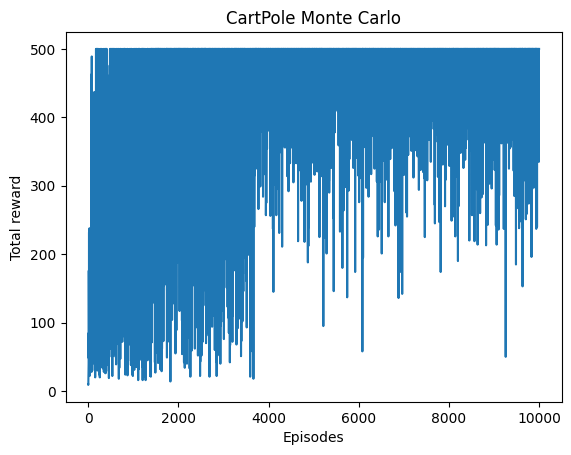

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")

# Hyperparameters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500

# For stats
total_rewards = []  # Moved outside the mc_control function

# Simple state discretization
def discretize_state(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    ratios[3] = np.clip(ratios[3], 0, 1)
    new_obs = [int(round((bucket_size - 1) * ratios[i])) for i, bucket_size in enumerate((1, 1, 6, 12))]
    return tuple(new_obs)

Q_table = np.zeros((1, 1, 6, 12, env.action_space.n))

def mc_control(epsilon=0.1):
    returns_sum = {}
    returns_count = {}

    for episode in range(EPISODES):
        episode_reward = 0
        state = discretize_state(env.reset())
        done = False
        episode_transitions = []

        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[state])

            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state)
            episode_transitions.append((state, action, reward))
            state = next_state
            episode_reward += reward

        total_rewards.append(episode_reward)  # Appending reward of each episode

        # Update Q-values and counts for each state-action pair in the episode
        for state, action, reward in episode_transitions:
            sa_pair = (state, action)
            if sa_pair not in returns_sum:
                returns_sum[sa_pair] = 0
                returns_count[sa_pair] = 0
            returns_sum[sa_pair] += episode_reward
            returns_count[sa_pair] += 1
            Q_table[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]

        if episode % EPISODE_DISPLAY == 0:
            print(f"Episode: {episode} total reward: {episode_reward}")

    return Q_table, total_rewards  # Return the list for plotting

Q_table, total_rewards = mc_control()  # Capture returned total_rewards

# Plotting
plt.plot(total_rewards)
plt.title('CartPole Monte Carlo')
plt.ylabel('Total reward')
plt.xlabel('Episodes')
plt.show()


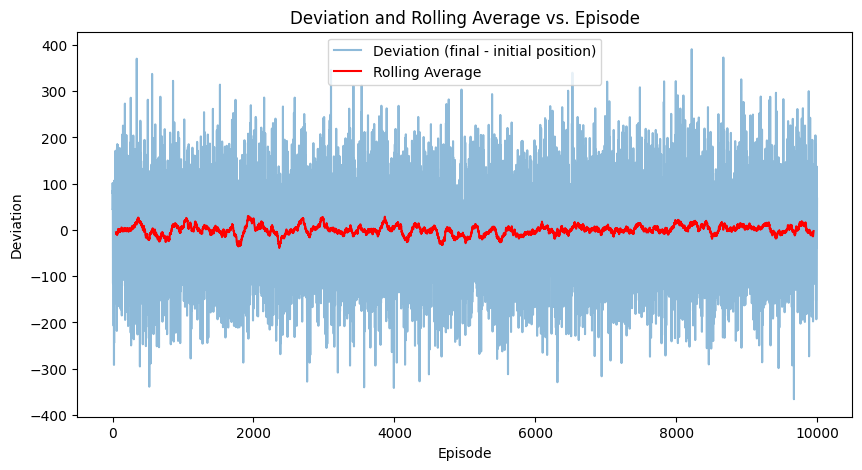

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
deviations = np.random.normal(loc=0, scale=100, size=10000)  # Generating some random deviation data

# Make sure deviations is a NumPy array for easier processing
deviations = np.array(deviations)

# Set the window size for the rolling average
window_size = 100  # You can adjust this based on how smooth you want the curve to be

# Calculate the rolling average
rolling_avg = np.convolve(deviations, np.ones(window_size)/window_size, mode='valid')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(deviations, label='Deviation (final - initial position)', alpha=0.5)  # Original data with some transparency
plt.plot(range(window_size // 2, len(deviations) - window_size // 2 + 1), rolling_avg, label='Rolling Average', color='red')  # Rolling average
plt.xlabel('Episode')
plt.ylabel('Deviation')
plt.title('Deviation and Rolling Average vs. Episode')
plt.legend()
plt.show()


Episode: 0 total reward: 5.0
Episode: 500 total reward: 222.0
Episode: 1000 total reward: 213.0
Episode: 1500 total reward: 160.0
Episode: 2000 total reward: 121.0
Episode: 2500 total reward: 102.0
Episode: 3000 total reward: 93.0
Episode: 3500 total reward: 63.0
Episode: 4000 total reward: 217.0
Episode: 4500 total reward: 63.0
Episode: 5000 total reward: 151.0
Episode: 5500 total reward: 250.0
Episode: 6000 total reward: 250.0
Episode: 6500 total reward: 250.0
Episode: 7000 total reward: 114.0
Episode: 7500 total reward: 112.0
Episode: 8000 total reward: 250.0
Episode: 8500 total reward: 250.0
Episode: 9000 total reward: 194.0
Episode: 9500 total reward: 250.0


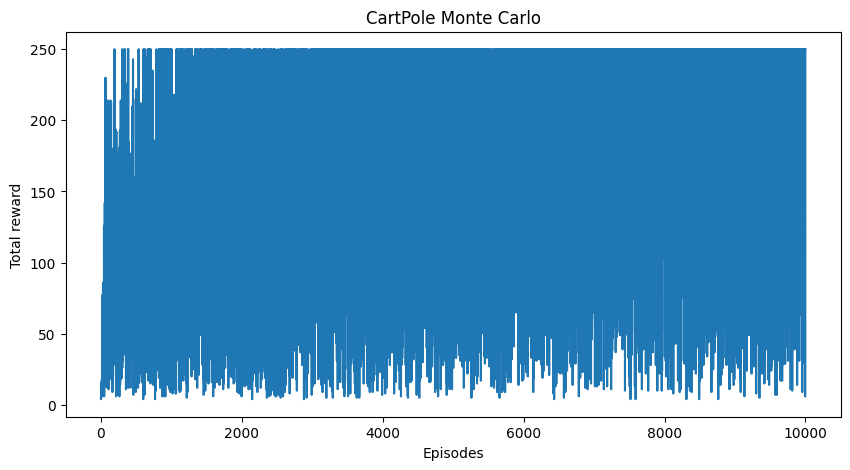

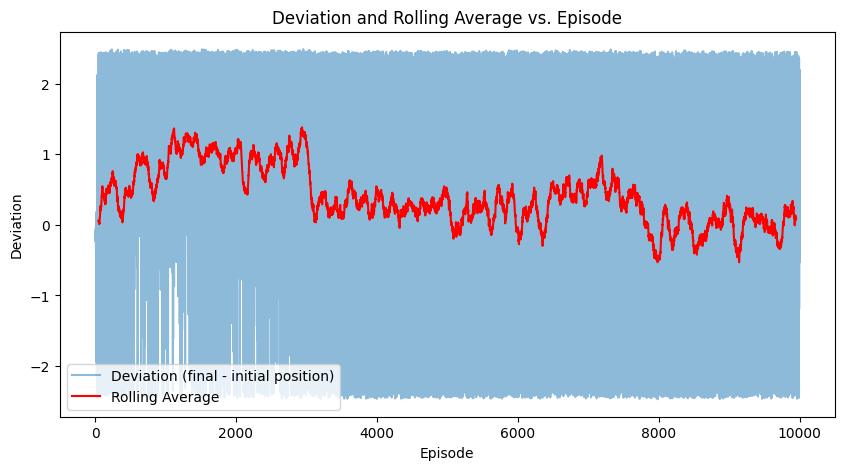

In [46]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# CartPole Monte Carlo Control

env = gym.make("CartPole-v1")

# Hyperparameters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500

# For stats
total_rewards = []  # Moved outside the mc_control function
deviations = []  # List to store deviations

# Simple state discretization
def discretize_state(obs):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    ratios[3] = np.clip(ratios[3], 0, 1)
    new_obs = [int(round((bucket_size - 1) * ratios[i])) for i, bucket_size in enumerate((1, 1, 6, 12))]
    return tuple(new_obs)

Q_table = np.zeros((1, 1, 6, 12, env.action_space.n))

def mc_control(epsilon=0.1):
    returns_sum = {}
    returns_count = {}

    for episode in range(EPISODES):
        episode_reward = 0
        state = discretize_state(env.reset())
        done = False
        episode_transitions = []

        initial_state = env.reset()
        initial_position = initial_state[0]  # Record the initial position


        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[state])
            new_state, reward, done, _ = env.step(action)


            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state)
            episode_transitions.append((state, action, reward))
            state = next_state
            episode_reward += reward

        total_rewards.append(episode_reward)  # Appending reward of each episode

        final_position = new_state[0]  # Record the final position
        deviations.append(final_position - initial_position)  # Compute the deviation



        # Update Q-values and counts for each state-action pair in the episode
        for state, action, reward in episode_transitions:
            sa_pair = (state, action)
            if sa_pair not in returns_sum:
                returns_sum[sa_pair] = 0
                returns_count[sa_pair] = 0
            returns_sum[sa_pair] += episode_reward
            returns_count[sa_pair] += 1
            Q_table[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]

        if episode % EPISODE_DISPLAY == 0:
            print(f"Episode: {episode} total reward: {episode_reward}")

    return Q_table, total_rewards  # Return the list for plotting

# Call mc_control function
Q_table, total_rewards = mc_control()  # Capture returned total_rewards

# Plotting for Monte Carlo Control
plt.figure(figsize=(10, 5))
plt.plot(total_rewards)
plt.title('CartPole Monte Carlo')
plt.ylabel('Total reward')
plt.xlabel('Episodes')
plt.show()


# Make sure deviations is a NumPy array for easier processing
deviations = np.array(deviations)

# Set the window size for the rolling average
window_size = 100  # You can adjust this based on how smooth you want the curve to be

# Calculate the rolling average
rolling_avg = np.convolve(deviations, np.ones(window_size)/window_size, mode='valid')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(deviations, label='Deviation (final - initial position)', alpha=0.5)  # Original data with some transparency
plt.plot(range(window_size // 2, len(deviations) - window_size // 2 + 1), rolling_avg, label='Rolling Average', color='red')  # Rolling average
plt.xlabel('Episode')
plt.ylabel('Deviation')
plt.title('Deviation and Rolling Average vs. Episode')
plt.legend()
plt.show()

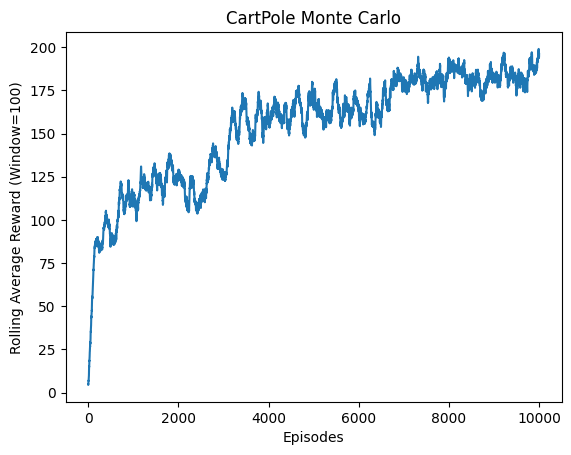

In [47]:
# Plotting
def plot_rewards(total_rewards, window=100):
    rolling_avg_rewards = [np.mean(total_rewards[max(0, i-window):i+1]) for i in range(len(total_rewards))]
    plt.plot(rolling_avg_rewards)
    plt.title('CartPole Monte Carlo')
    plt.ylabel(f'Rolling Average Reward (Window={window})')
    plt.xlabel('Episodes')
    plt.show()

plot_rewards(total_rewards)
